In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# Statistical summary of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Explore the dataset by visualization
Usually in this step I can find the characteristics of dataset through various visualization techniques. I drew a correlation matrix heat map to depict the different degrees of correlation among the variables. As to price, high positively correlated features include sqft_living, grade, sqft_above, and sqft_living15. There are two negatively correlated features id and zipcode, and they have a very low correlation with price as well.

<AxesSubplot:>

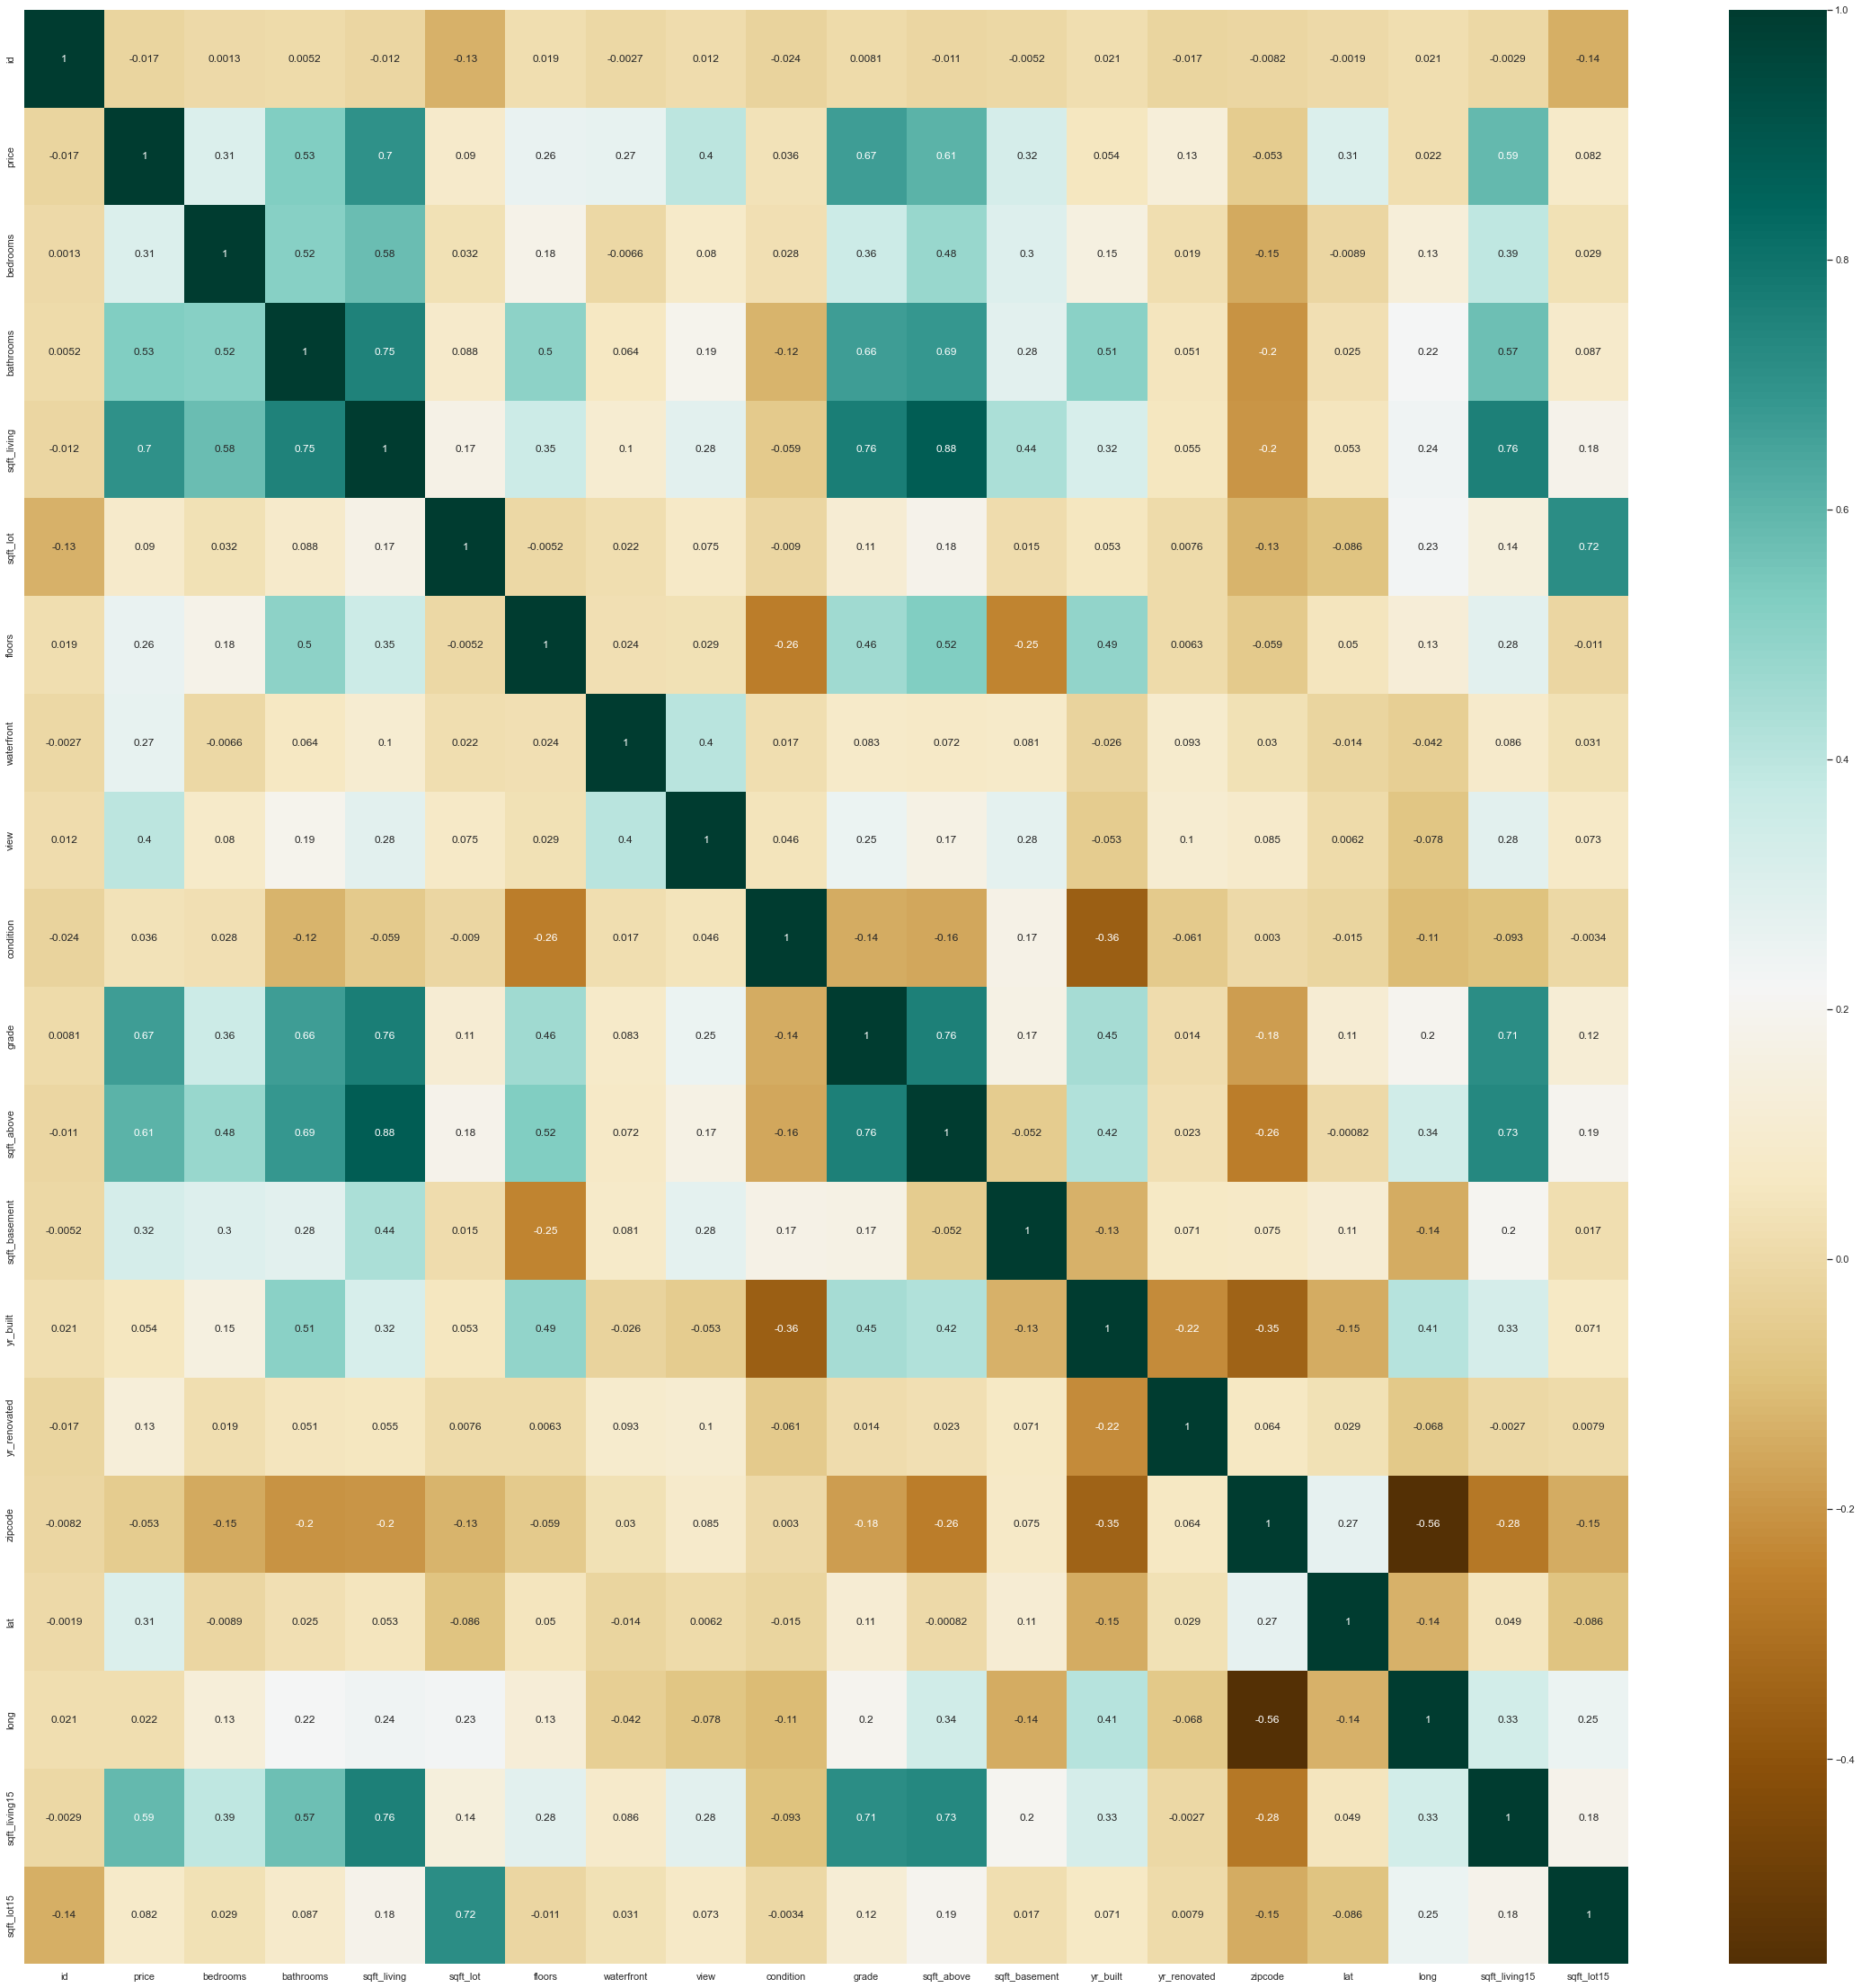

In [7]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.offline as ply
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from plotly import tools
sns.set(style = "whitegrid")

corr_mat = df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr_mat,linecolor='white',cmap='BrBG',annot=True)


With distribution plot of price, I can see that most of the prices are under 1 million with few outliers, some even close to 8 million.

<AxesSubplot:xlabel='price', ylabel='Density'>

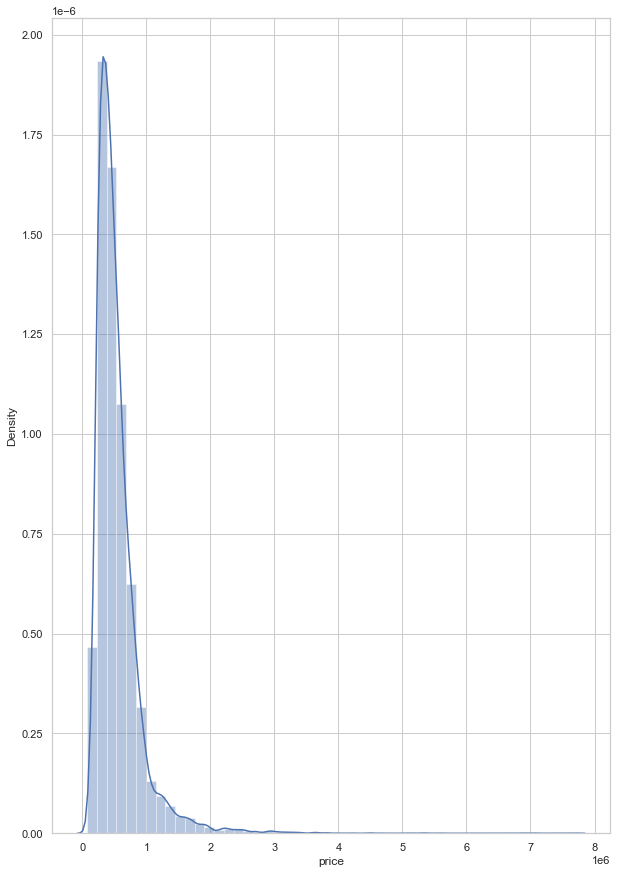

In [8]:
plt.figure(figsize=(10,15))
sns.distplot(df["price"])


In this subplot, y axis is price and x axis are sqft_living, bedrooms, bathrooms, grade, yr_built and lat. My first assumption for Linear Regression is that the features of the dataset have a linear relationship with those dependent variables.

<AxesSubplot:xlabel='price'>

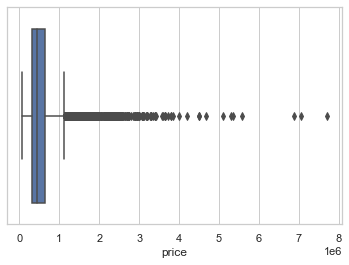

In [9]:
sns.boxplot(df['price'])

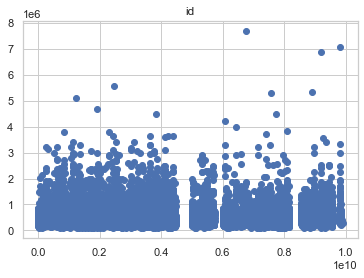

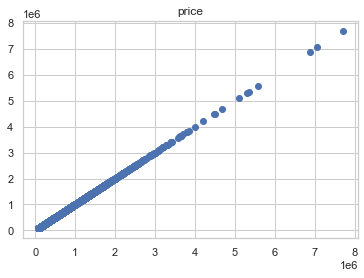

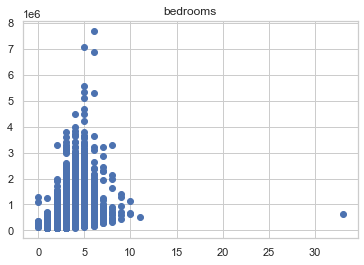

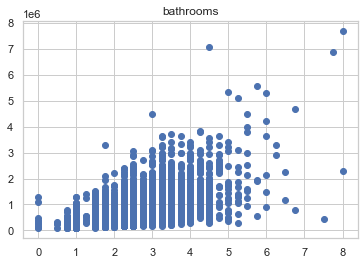

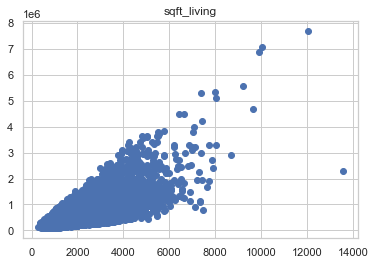

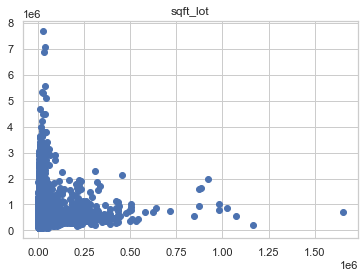

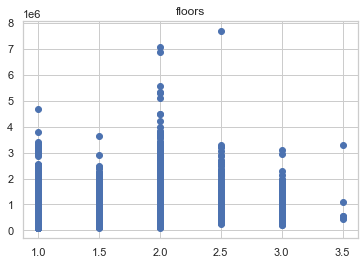

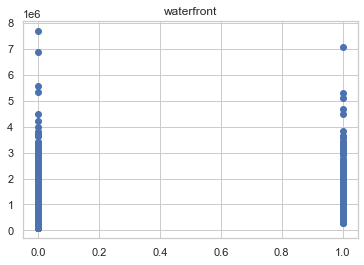

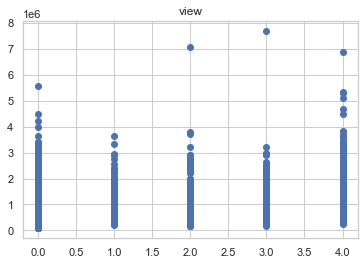

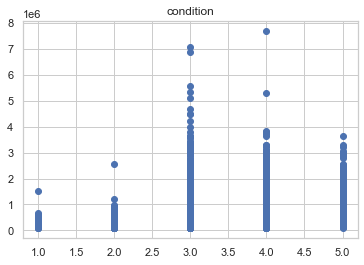

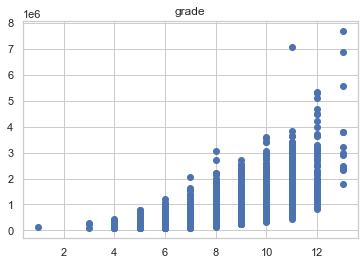

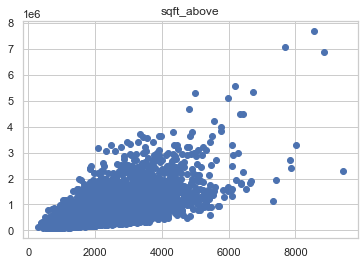

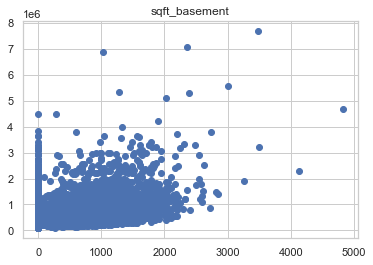

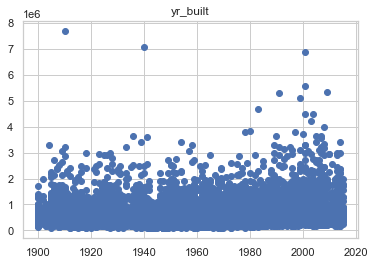

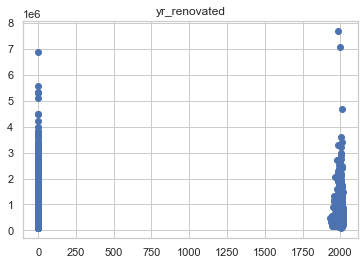

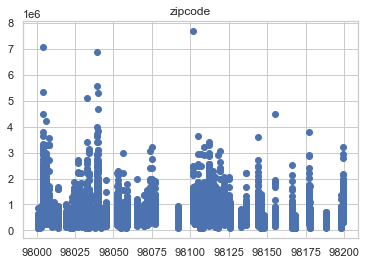

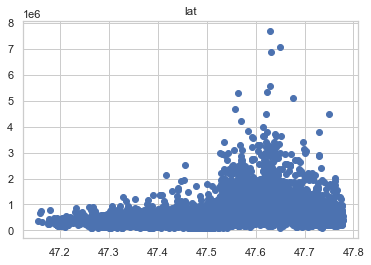

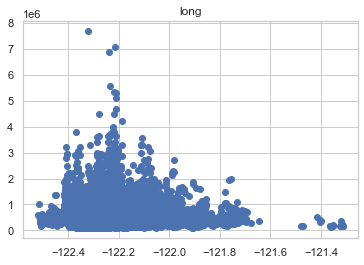

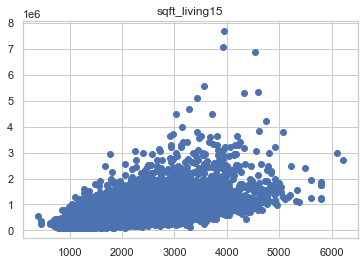

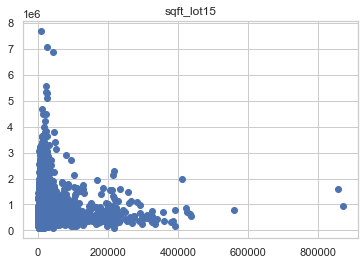

In [12]:
for i in df.columns:
    if np.dtype(df[i])=='int64' or np.dtype(df[i])=='float64':
        plt.title(i)
        plt.scatter(x= df[i],y =df['price'],)
        plt.show()


### Data Preprocessing
From output of kc_data.info() above, I can tell the dataset does not have null values. But as we can see from the visualization I need to remove some outliers with

In [13]:
df_n = df.drop(df[df['bedrooms']>10].index)

In [14]:
df_n

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [15]:
df_n.shape

(21611, 21)


## Create y and X, split data for training and testing

In [21]:
from sklearn.model_selection import train_test_split
y = df_n.price
features = ['bedrooms','bathrooms','sqft_living','grade','yr_built','lat']
x = df_n[features]
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [22]:
print(y_train.shape)
X_train.shape

(15127,)


(15127, 6)

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

65.13855352579296

## SVR

In [37]:
from sklearn.neighbors import KNeighborsRegressor
df_knn = KNeighborsRegressor(n_neighbors=1)
df_knn.fit(X_train,y_train)
y_knn_pred = df_knn.predict(X_test)

In [50]:
r2_score(y_test,y_knn_pred)*100

59.854379726992676

## Random forest 

In [40]:
from sklearn.ensemble import RandomForestRegressor
df_ran = RandomForestRegressor(n_estimators=20,random_state=0)
df_ran.fit(X_train,y_train)
y_ran_pred= df_ran.predict(X_test)

In [51]:
r2_score(y_test,y_ran_pred)*100

75.3029424445083

## XGBoost

In [43]:
from xgboost import XGBRegressor
df_xgb = XGBRegressor()
df_xgb.fit(X_train,y_train)
y_xgb_pred = df_xgb.predict(X_test)

In [52]:
r2_score(y_test,y_xgb_pred)*100

74.68043772308049

## Measuring the models

In [57]:
# Calculate Adjusted R Squared Value
knn_a = 1 - (1-r2_score(y_test,y_knn_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
knn_a*100

59.81719063919925

In [58]:
# Calculate Adjusted R Squared Value
xgb_a = 1 - (1-r2_score(y_test,y_xgb_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
xgb_a*100

74.65698282518616


XGBoost got second best score! First place was Random Forest.

## A real sample prediction

In [46]:
columns = ['bedrooms','bathrooms','sqft_living','grade','yr_built','lat']
sample = pd.DataFrame([[4,3.25,3360,10,1994,47.70]],columns=columns)
customer = sc_X.fit_transform(sample)
lrpredictor = lin_model.predict(customer)
print('Prediction by linear regression is',lrpredictor)

rfpredictor = df_ran.predict(customer)
print('Prediction by random forest is',rfpredictor)

knnpredictor = df_knn.predict(customer)
print('Prediction by KNN is',knnpredictor)

xgbpredictor = df_xgb.predict(customer)
print('Prediction by XGBoost is',xgbpredictor)

Prediction by linear regression is [537382.18410789]
Prediction by SVR is [450237.32339836]
Prediction by random forest is [627495.]
Prediction by KNN is [675000.]
Prediction by XGBoost is [583780.25]
